In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,f1_score,classification_report

In [2]:
df=pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.drop(['CLIENTNUM'],axis=1,inplace=True)

In [4]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'],axis=1,inplace=True)

In [5]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
df.shape

(10127, 20)

In [7]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## Exploratory Data Analysis🍞

In [8]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [11]:
object_cols_df=df.select_dtypes(include='object')
object_col=list(object_cols_df)
print(object_col)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [12]:
num_cols_df=df.select_dtypes(include='number')
num_col=list(num_cols_df)
print(num_col)

['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


# Cleaning Of Dataset

In [13]:
# Remove Duplicates
def drop_dup(df):
    if df.duplicated().any()==True:
        print('Duplicate datas are found:',df.duplicated().sum())
        df.duplicates(axis=1,inplace=True,  Keep=last)
        df=df.reset.index(drop=True)
        
    else:
        return("No duplicates are found")
drop_dup(df)   

'No duplicates are found'

# checking Null Values
        

In [14]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

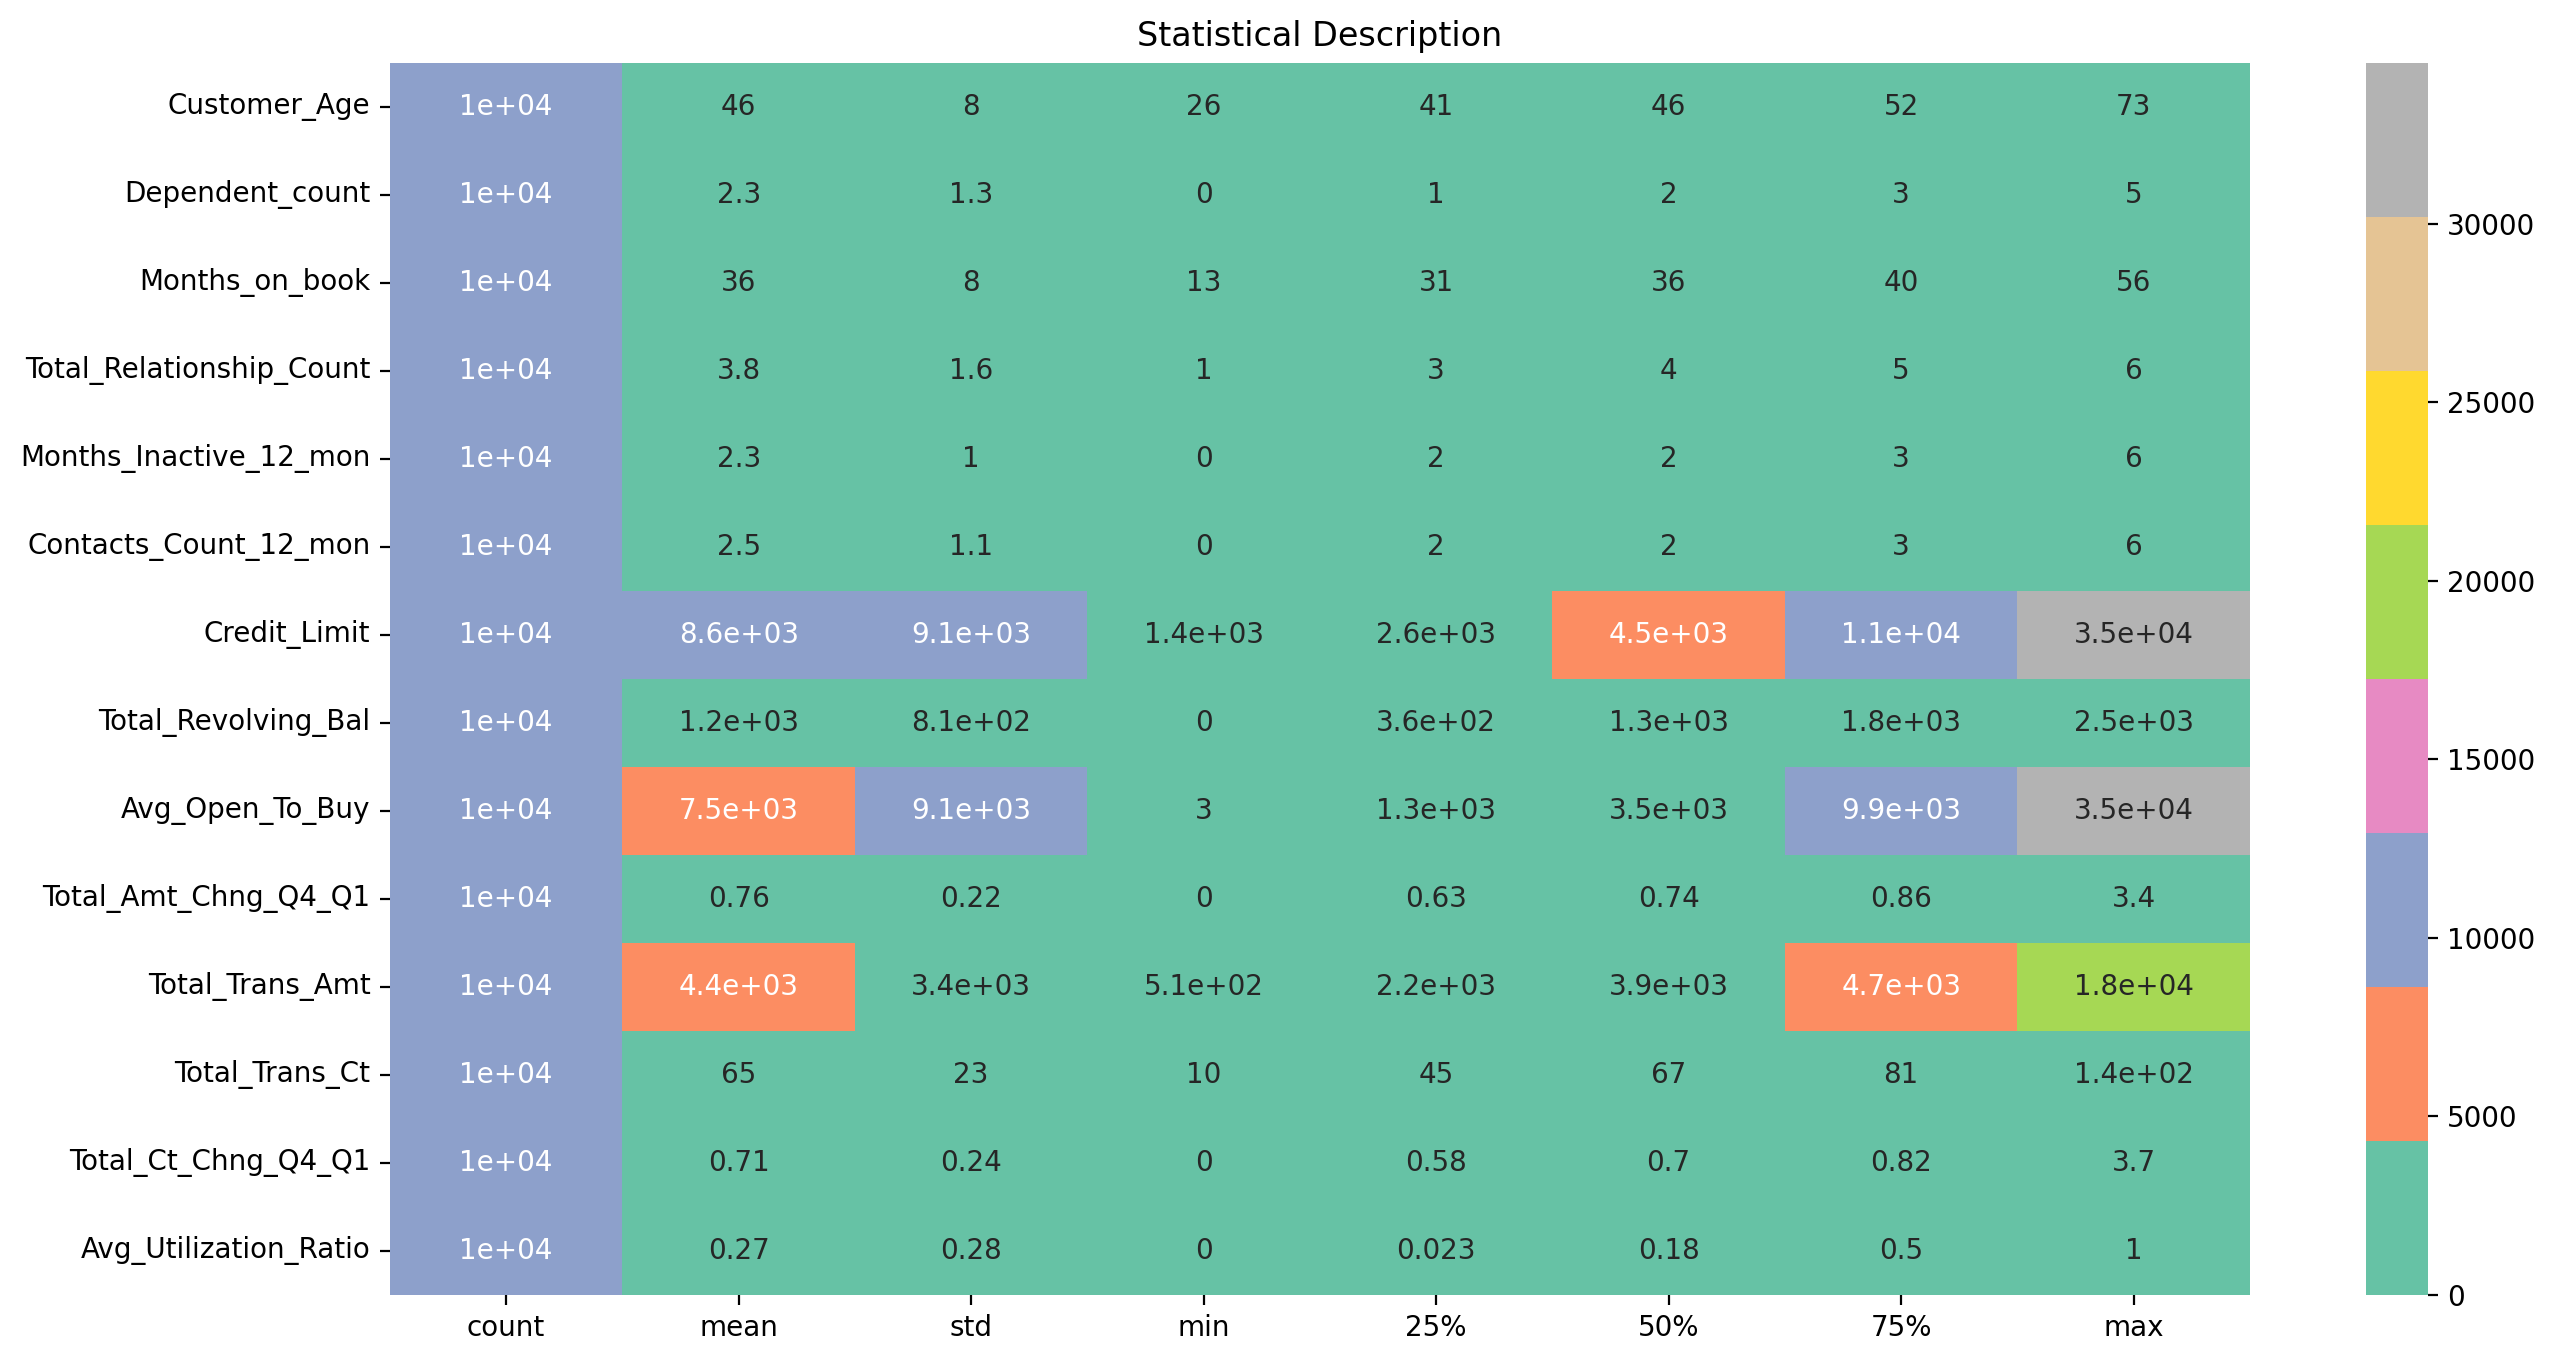

In [15]:
Heat=df.describe().T
plt.figure(figsize=(15,8),dpi=200)
sns.heatmap(Heat,cmap='Set2',annot=True)
plt.title('Statistical Description')
plt.show()

# Checking Unique Counts

In [16]:
Unique=df.nunique().sort_values()

Attrition_Flag                 2
Gender                         2
Card_Category                  4
Marital_Status                 4
Income_Category                6
Total_Relationship_Count       6
Dependent_count                6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Education_Level                7
Months_on_book                44
Customer_Age                  45
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
Total_Amt_Chng_Q4_Q1        1158
Total_Revolving_Bal         1974
Total_Trans_Amt             5033
Credit_Limit                6205
Avg_Open_To_Buy             6813
dtype: int64


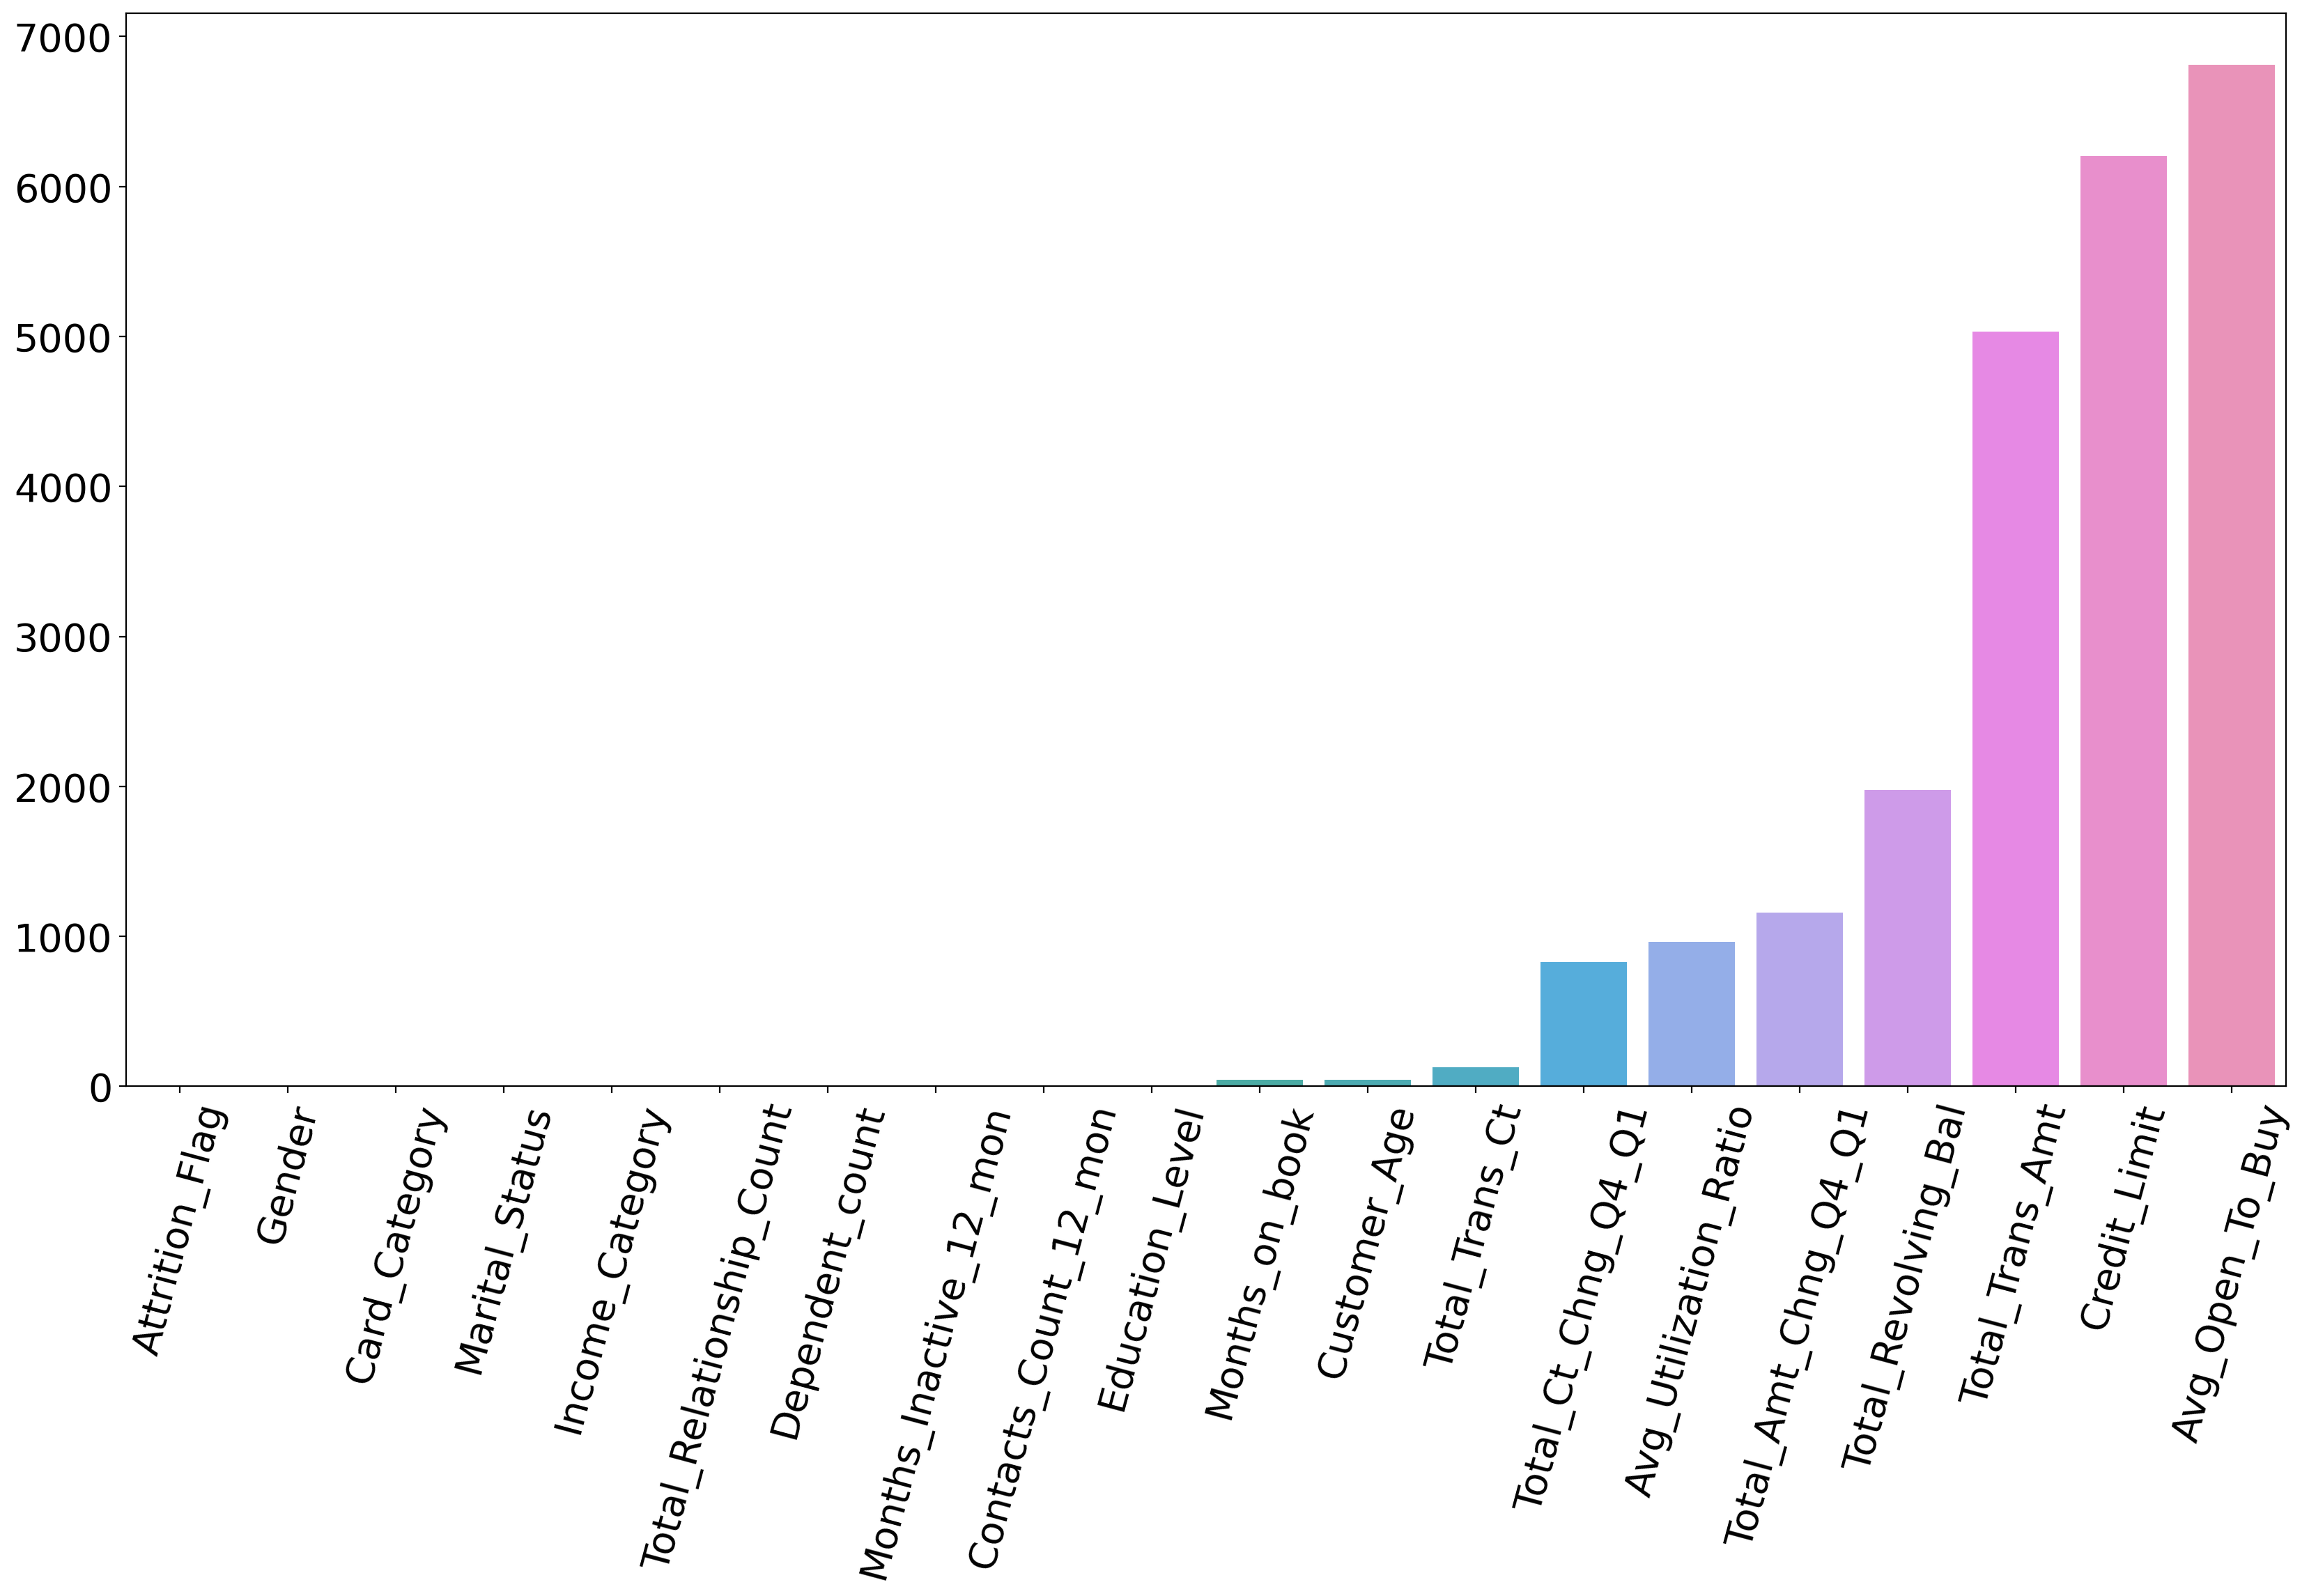

In [17]:
print(Unique)

plt.figure(figsize=(20,10),dpi=200)
sns.barplot(x=Unique.index,y=Unique.values)
plt.xticks(rotation=75,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# percentage count of categorical columns

In [41]:
pie_col=['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

pie_col1=df[pie_col].nunique().sort_values()
print(pie_col1)
pie_col2=pie_col1.index

Attrition_Flag     2
Gender             2
Marital_Status     4
Card_Category      4
Income_Category    6
Education_Level    7
dtype: int64


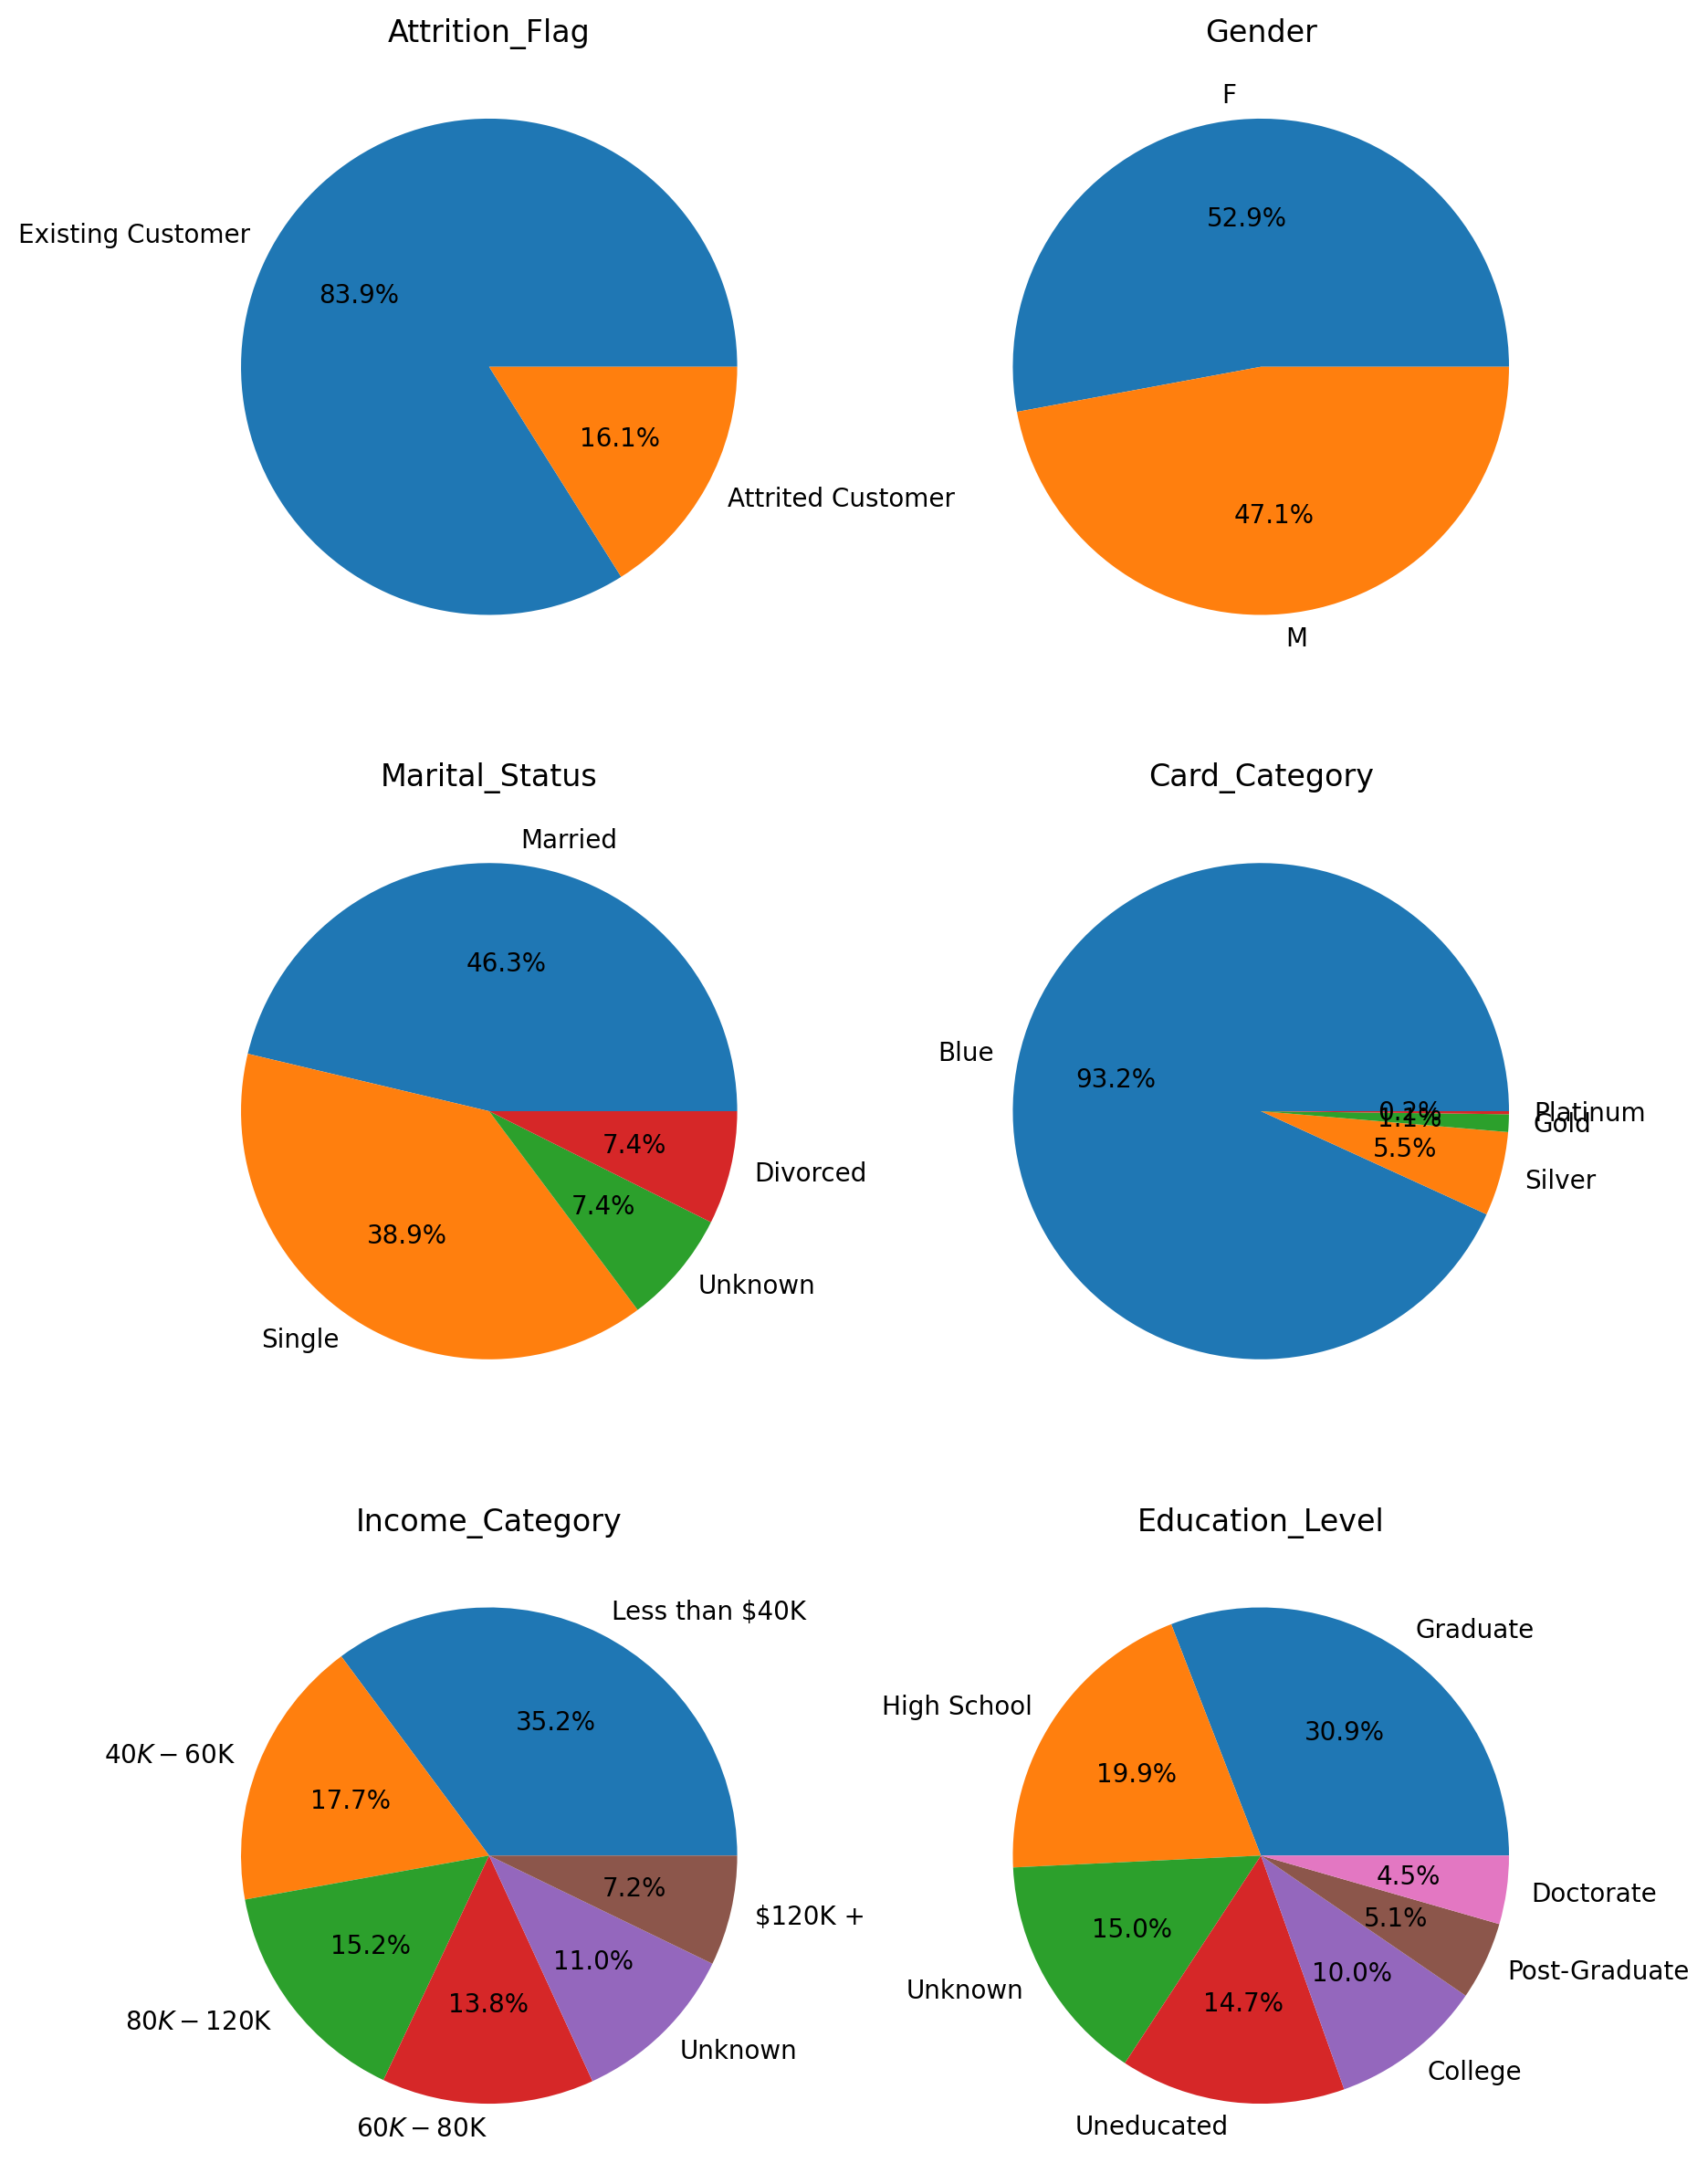

In [45]:
plt.figure(figsize=(10,15),dpi=200)
for i,col in enumerate(pie_col2):
    plt.subplot(3,2, i+1)
    df[col].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.title(f'{col}')
    plt.ylabel('')

In [67]:
fg=df.select_dtypes(include='number')

numbercont=list(fg)   
numbercont

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

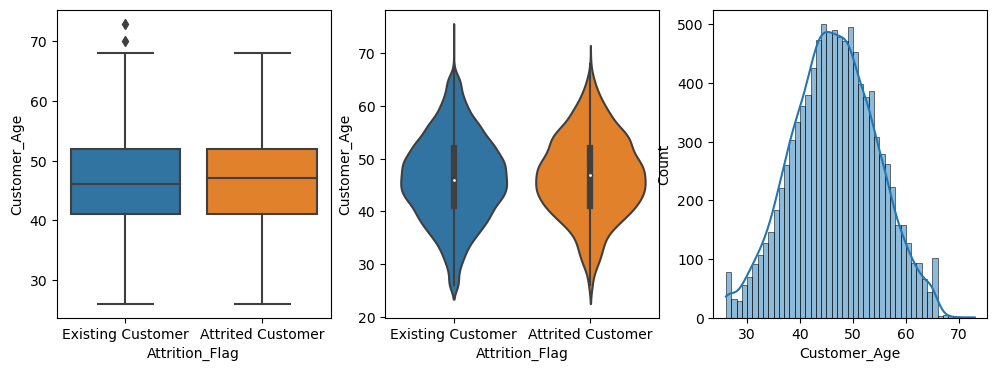

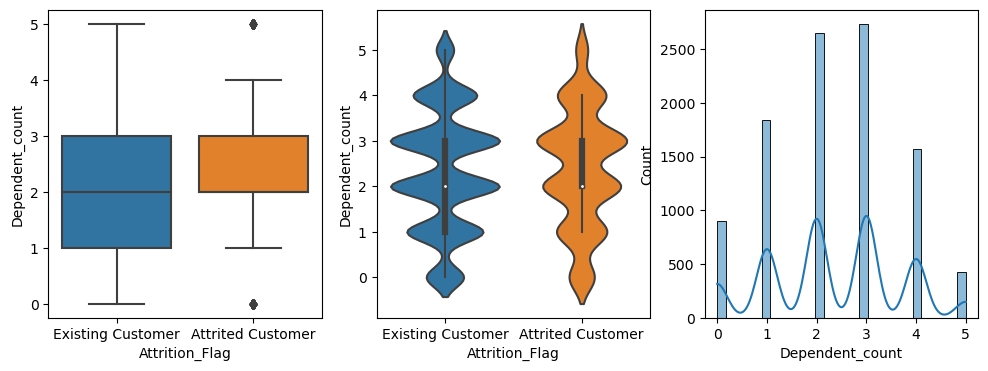

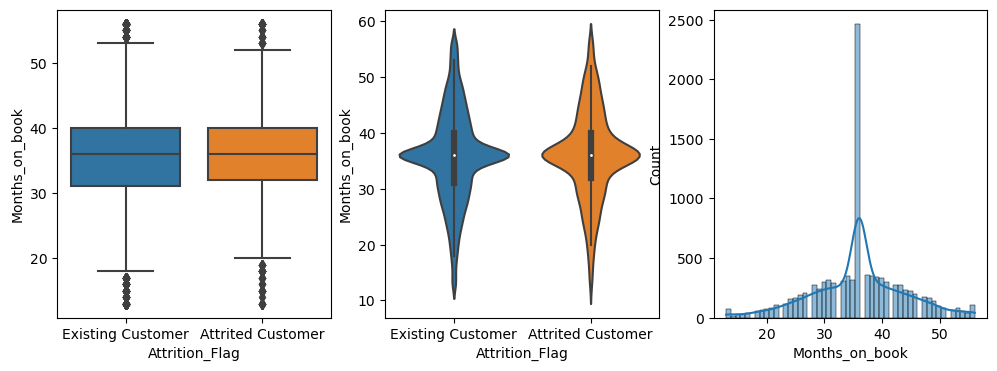

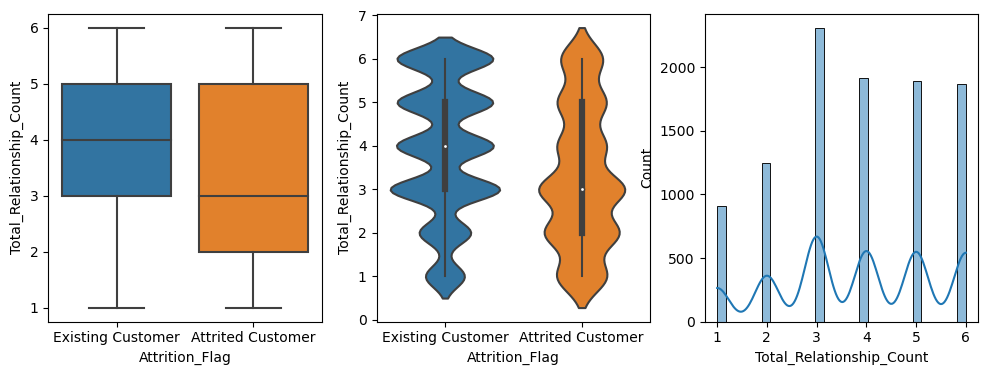

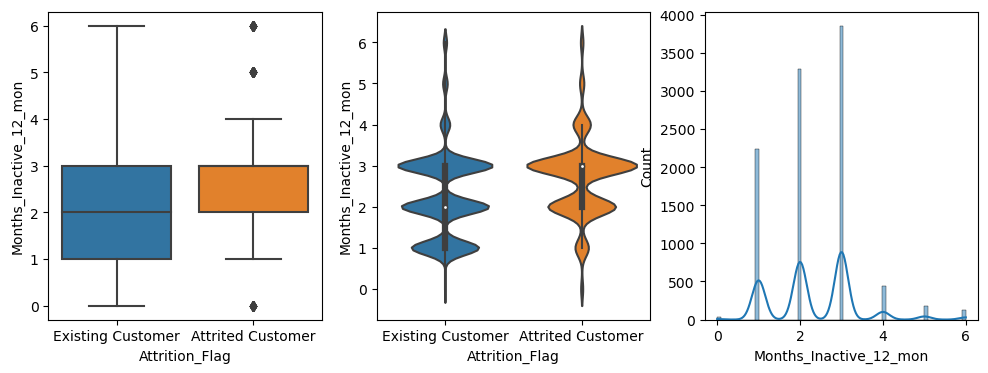

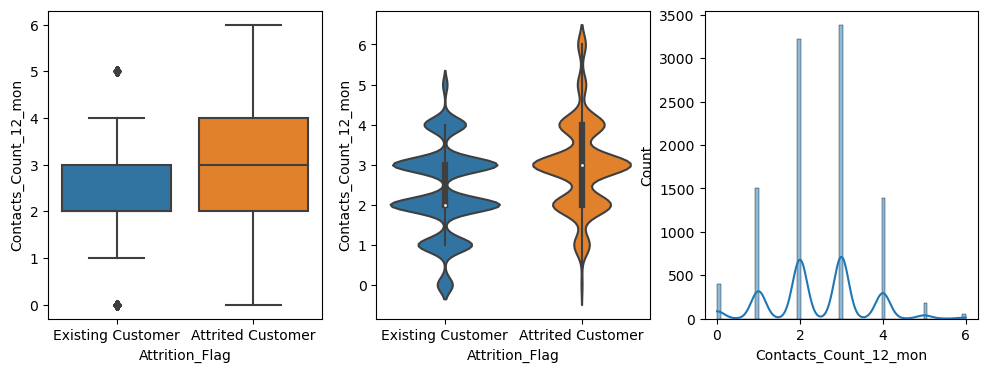

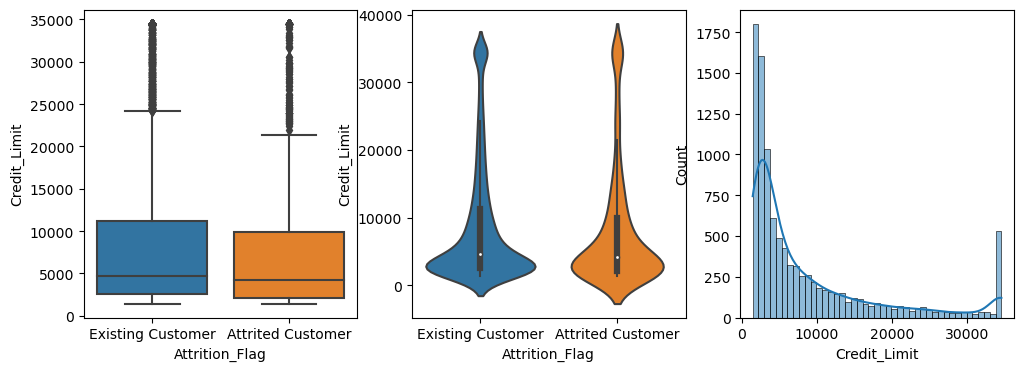

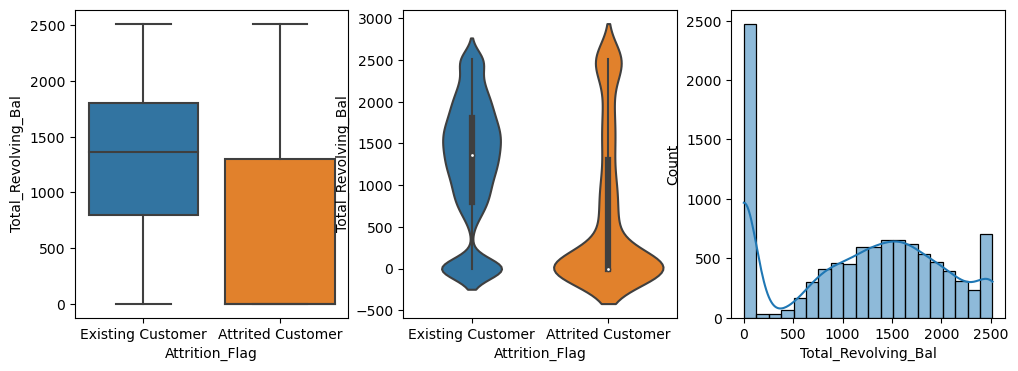

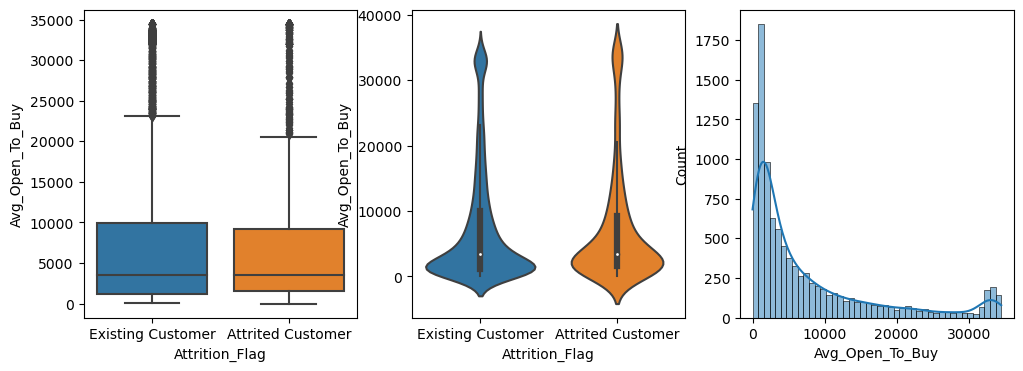

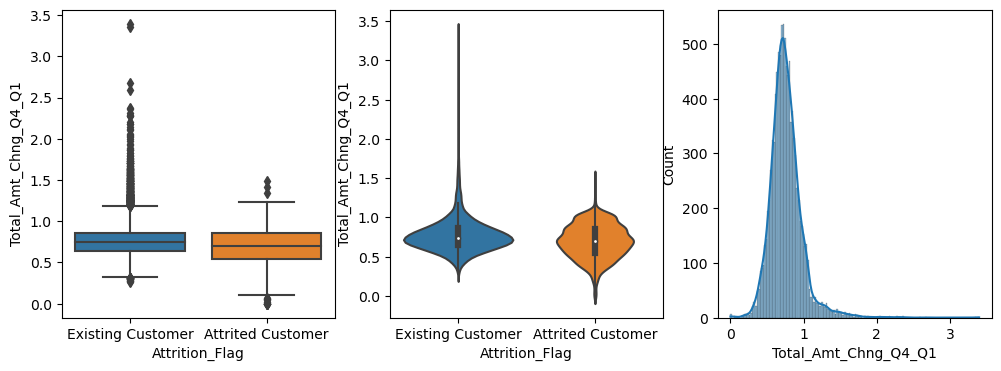

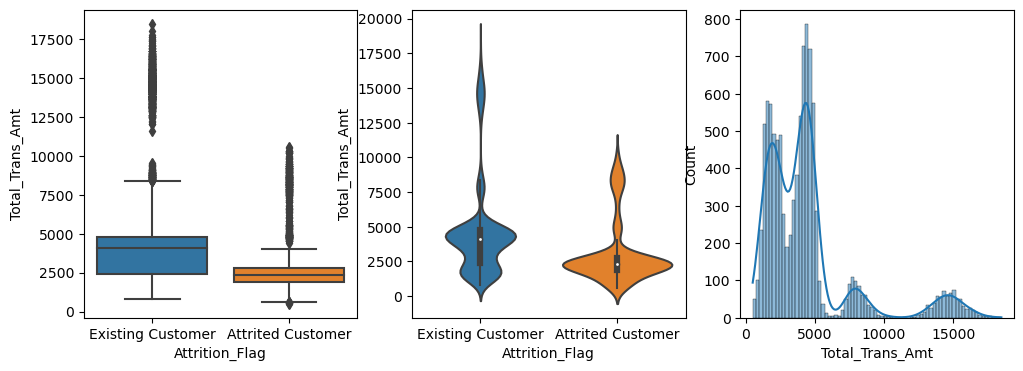

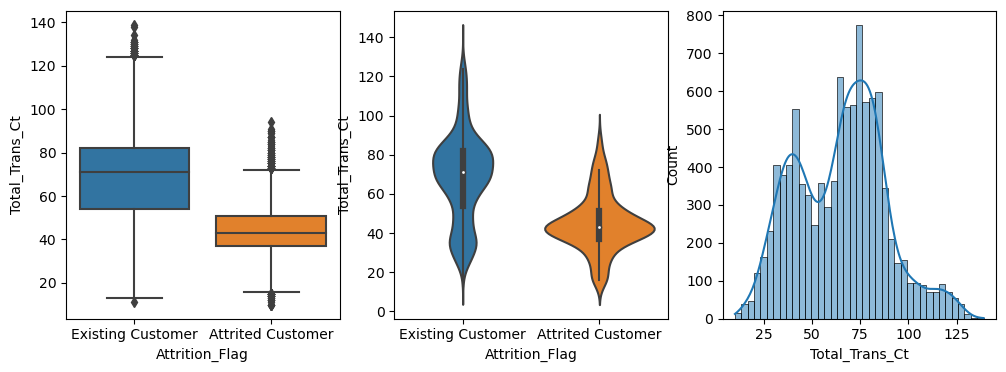

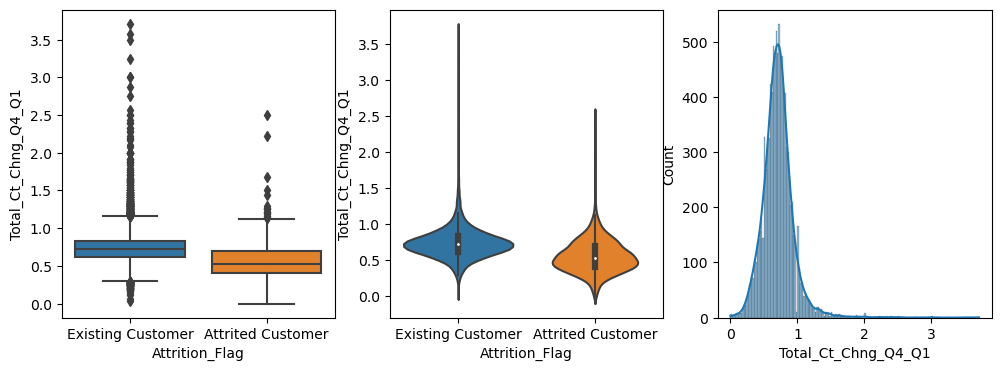

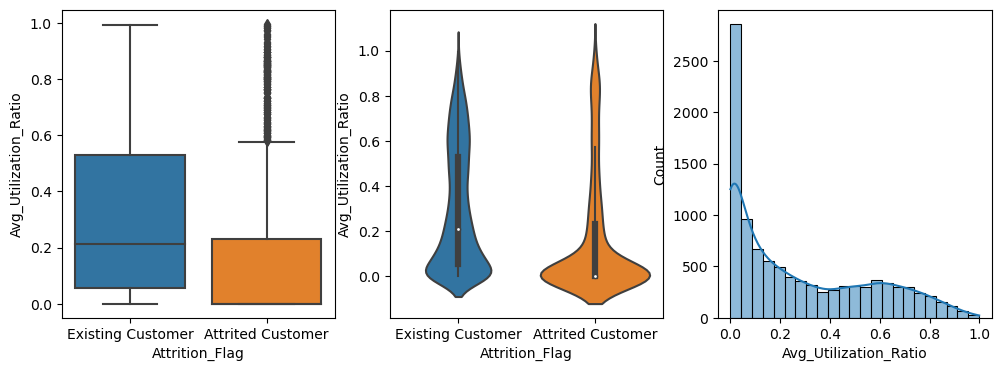

In [71]:
def num_dist(column,target='Attrition_Flag'):
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    sns.boxplot(x=target,y=column,data=df)
    
    plt.subplot(1,3,2)
    sns.violinplot(x=target,y=column,data=df)
    
    plt.subplot(1,3,3)
    sns.histplot(x=column,kde=True,data=df)
    
for col in numbercont:
    num_dist(col,target='Attrition_Flag')
    
    
    

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

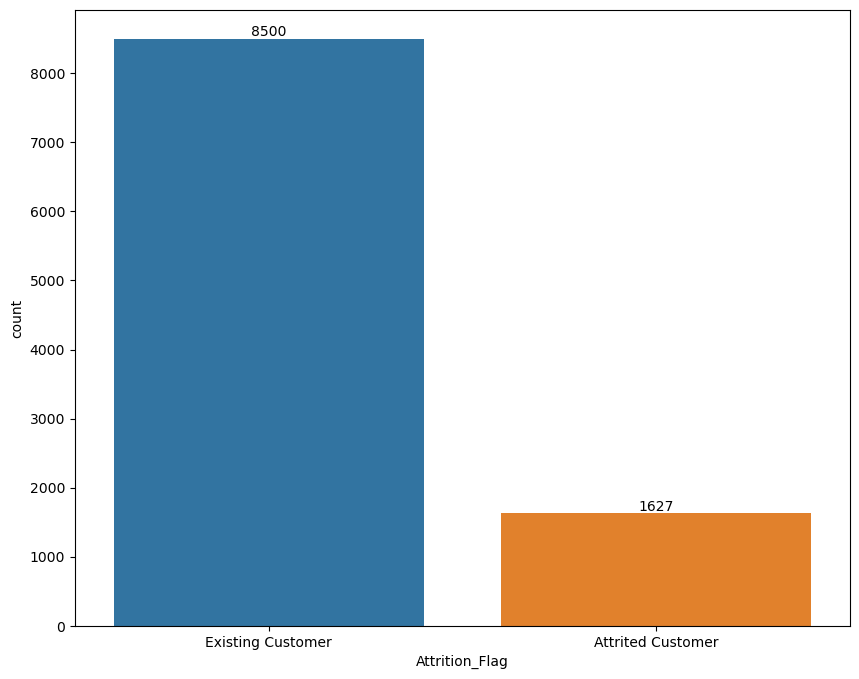

In [80]:
plt.figure(figsize=(10,8))
hj=sns.countplot(df['Attrition_Flag'])
for i in hj.containers:
    hj.bar_label(i)

- Observation--Imbalanced Data set

# Encodeing

In [92]:
cd.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [105]:
cd['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [107]:
cd['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [108]:
cd['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [115]:
cd['Attrition_Flag']=cd['Attrition_Flag'].str.replace('Attrited Customer','1')

In [116]:
cd.tail(20)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10107,1,61,M,0,Graduate,Single,$60K - $80K,Blue,54,2,1,4,11859.0,1644,10215.0,0.866,8930,79,0.837,0.139
10108,1,47,M,4,Graduate,Divorced,$80K - $120K,Blue,39,4,3,4,17504.0,476,17028.0,0.892,10468,66,0.737,0.027
10109,0,47,M,5,High School,Single,Less than $40K,Blue,35,4,3,5,4165.0,0,4165.0,0.813,17093,111,0.820,0.000
10110,0,56,M,1,Graduate,Single,$80K - $120K,Silver,49,5,2,2,34516.0,1091,33425.0,0.640,15274,108,0.714,0.032
10111,0,49,M,1,Graduate,Single,$60K - $80K,Blue,40,6,3,3,6481.0,1569,4912.0,0.692,15937,119,0.803,0.242
10112,1,33,M,2,College,Married,$120K +,Gold,20,2,1,4,34516.0,0,34516.0,1.004,9338,73,0.622,0.000
10113,1,27,M,0,High School,Divorced,$60K - $80K,Blue,36,2,3,2,13303.0,2517,10786.0,0.929,10219,85,0.809,0.189
10114,0,29,M,0,Graduate,Married,Less than $40K,Blue,15,3,1,5,4700.0,0,4700.0,0.617,14723,96,0.655,0.000
10115,0,38,M,1,Uneducated,Single,$40K - $60K,Blue,36,2,3,2,5639.0,1558,4081.0,0.614,16628,109,0.946,0.276
10116,0,46,M,5,College,Single,$80K - $120K,Blue,36,1,2,3,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170


In [119]:
cd['Education_Level']=cd['Education_Level'].str.replace('Unknown','Graduate')

In [120]:
cd['Education_Level'].value_counts()

Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [121]:
cd['Marital_Status']=cd['Marital_Status'].str.replace('Unknown','Married')

In [122]:
cd['Marital_Status'].value_counts()

Married     5436
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

In [123]:
cd.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [124]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [125]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
cd['Gender']=la.fit_transform(cd['Gender'])

In [158]:
cd.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,1,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,3,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,3,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,1,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,0,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [159]:
cd['Marital_Status']=la.fit_transform(cd['Marital_Status'])

In [175]:
cd.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,1,2,$60K - $80K,2,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,3,1,Less than $40K,2,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,3,2,$80K - $120K,2,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,1,2,Less than $40K,2,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,0,2,$60K - $80K,2,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [182]:
cd['Attrition_Flag']=cd['Attrition_Flag'].astype(int)

In [184]:
cd['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [188]:
cd['Income_Category']=cd['Income_Category'].replace('Less than $40K',35.0)
cd['Income_Category']=cd['Income_Category'].replace('$40K - $60K',50.0)
cd['Income_Category']=cd['Income_Category'].replace('$80K - $120K',100.0)
cd['Income_Category']=cd['Income_Category'].replace('Unknown',np.NaN)
cd['Income_Category']=cd['Income_Category'].replace('$60K - $80K',70)
cd['Income_Category']=cd['Income_Category'].replace('$120K +',125)

In [191]:
cd.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level                0
Marital_Status                 0
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [192]:
amean=cd['Income_Category'].mean

In [195]:
cd['Income_Category'].fillna(amean,inplace=True)

In [196]:
cd.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# Train Test_Split

In [280]:
X=cd.iloc[:,1:]
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,1,3,1,2,70.0,2,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,0,5,3,1,35.0,2,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,1,3,3,2,100.0,2,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,0,4,1,2,35.0,2,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,1,3,0,2,70.0,2,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,3,1,50.0,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,1,2,3,0,50.0,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,0,1,1,2,35.0,2,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,1,2,3,2,50.0,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [279]:
Y=cd.iloc[:,0]
Y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int32

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  int32  
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  int32  
 4   Marital_Status            10127 non-null  int32  
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  int32  
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [316]:
X['Income_Category']=X['Income_Category'].astype('str')

In [328]:
X.drop(['Income_Category'],axis=1,inplace=True)

In [329]:
X.head(5)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,1,3,1,2,2,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,0,5,3,1,2,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,1,3,3,2,2,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,0,4,1,2,2,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,1,3,0,2,2,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [333]:
gh=df=pd.read_csv("BankChurners.csv")

In [369]:
Income=gh.iloc[:,7]

In [372]:
Income.head()

0     70.0
1     35.0
2    100.0
3     35.0
4     70.0
Name: Income_Category, dtype: float64

In [371]:
Income=Income.replace('Less than $40K',35.0)
Income=Income.replace('$40K - $60K',50.0)
Income=Income.replace('$80K - $120K',100.0)
Income=Income.replace('Unknown',np.NaN)
Income=Income.replace('$60K - $80K',70)
Income=Income.replace('$120K +',125)

In [377]:
Income=Income.replace(np.NaN,45)

In [383]:
X=pd.concat([X,Income],axis=1)

# Balancing the Dataset

In [387]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X_sampled,Y_sampled=SMOTE().fit_resample(X,Y)

Value_counts=Counter(Y_sampled)
print(Value_counts)

print(X_sampled.shape,Y_sampled.shape)

Counter({0: 8500, 1: 8500})
(17000, 19) (17000,)


# Train test Split

In [390]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_sampled,Y_sampled,test_size=0.25,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(12750, 19) (4250, 19) (12750,) (4250,)


In [391]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,f1_score,classification_report

In [392]:
xgb=XGBClassifier()

model_xgb=xgb.fit(x_train,y_train)

y_predicated=model_xgb.predict(x_test)

print(classification_report(y_test,y_predicated))
print("F1 score: ",f1_score(y_test,y_predicated))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2131
           1       0.98      0.99      0.98      2119

    accuracy                           0.98      4250
   macro avg       0.98      0.98      0.98      4250
weighted avg       0.98      0.98      0.98      4250

F1 score:  0.9833684703677676


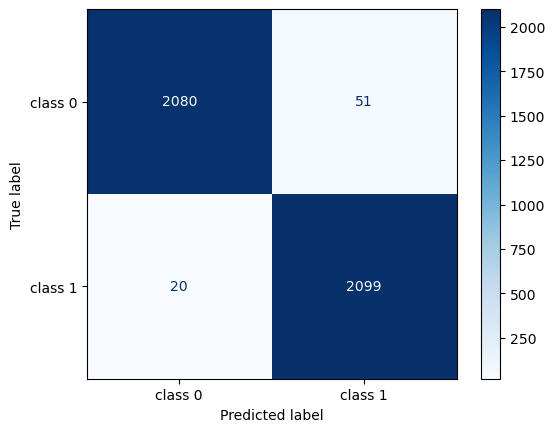

In [394]:
cm=confusion_matrix(y_test,y_predicated)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['class 0','class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [395]:
rf=RandomForestClassifier()

model_rf=rf.fit(x_train,y_train)

y_predicated_rf=model_rf.predict(x_test)

print(classification_report(y_test,y_predicated_rf))
print("F1 score: ",f1_score(y_test,y_predicated_rf))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2131
           1       0.97      0.99      0.98      2119

    accuracy                           0.98      4250
   macro avg       0.98      0.98      0.98      4250
weighted avg       0.98      0.98      0.98      4250

F1 score:  0.9793814432989693


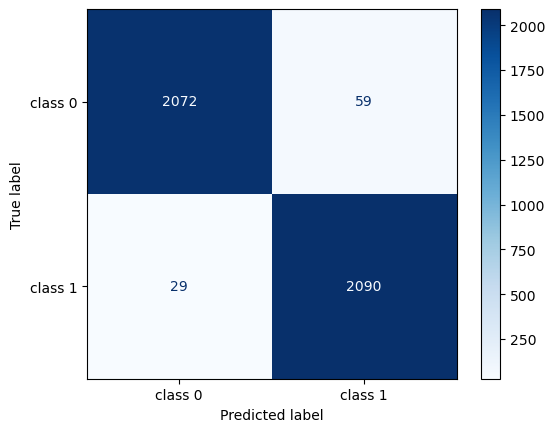

In [396]:
cm=confusion_matrix(y_test,y_predicated_rf)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['class 0','class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [397]:
from sklearn.svm import SVC

In [398]:
sv=SVC()

model_sv=sv.fit(x_train,y_train)

y_predicated_sv=model_sv.predict(x_test)

print(classification_report(y_test,y_predicated_sv))
print("F1 score: ",f1_score(y_test,y_predicated_sv))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      2131
           1       0.73      0.75      0.74      2119

    accuracy                           0.74      4250
   macro avg       0.74      0.74      0.74      4250
weighted avg       0.74      0.74      0.74      4250

F1 score:  0.7412066154204519


###  Observation

- XGboost alogrithem predicted very good in crtical calssification problem.98% percent accuracy is acheived.